# Sommaire
 - <a href="#C1">Import des données</a>

**Partie 1 : Nettoyage de données**
 - <a href="#C2">Nettoyage de mon jeu de données</a>
 - <a href="#C3">Doublons</a>
 - <a href="#C4">Jointure</a>
 - <a href="#C5">Outliers</a>
 
**Partie 2 : Analyse des données**
 - <a href="#C6">Analyse indicateurs ventes</a>
 - <a href="#C7">Références</a>
 - <a href="#C8">Zoom profil clients</a>
 - <a href="#C9">Analyse Clientéle</a>
 - <a href="#C10">Analyse Bivarié</a>

# <a name="C1">Import des données</a>

In [1]:
#Import des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats 

In [2]:
#Import des fichiers nécessaire au projet
customers = pd.read_csv(r"C:\Users\Jonathan.Gourville\Desktop\DAN-P6-donnees\customers.csv")
products = pd.read_csv(r"C:\Users\Jonathan.Gourville\Desktop\DAN-P6-donnees\products.csv")
transactions = pd.read_csv(r"C:\Users\Jonathan.Gourville\Desktop\DAN-P6-donnees\transactions.csv")

# <a name="C2">P1 - Nettoyage de mon jeu de données</a>

## Customers

In [3]:
#Affichage du header de la table customers
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
#La colonne birth est en int64, la mettre en object ou date ?
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [5]:
#Affichage nombre de valeurs manquantes. 
customers.isnull().sum()
#Aucune valeur manquante

client_id    0
sex          0
birth        0
dtype: int64

## Transactions

In [6]:
#Affichage du header de la table transactions
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [7]:
transactions.info()
transactions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [8]:
transactions.loc[(transactions['id_prod'] == "T_0")]
#Ces lignes représentes des lignes de test, on peut considérer qu'elles ne sont pas utiles.

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [9]:
transactions.drop(transactions[(transactions['id_prod'] == "T_0")].index, inplace = True)
transactions.loc[(transactions['id_prod'] == "T_0")]
#Les lignes sont supprimées car elles sont des lignes de test.

,id_prod,date,session_id,client_id


In [10]:
#Transformer également la colonne date qui est en object en datetime
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')
transactions['date']

0        2022-05-20 13:21:29.043970
1        2022-02-02 07:55:19.149409
2        2022-06-18 15:44:33.155329
3        2021-06-24 04:19:29.835891
4        2023-01-11 08:22:08.194479
                    ...            
679527   2022-01-15 13:05:06.246925
679528   2022-03-19 16:03:23.429229
679529   2022-12-20 04:33:37.584749
679530   2021-07-16 20:36:35.350579
679531   2022-09-28 01:12:01.973763
Name: date, Length: 679332, dtype: datetime64[ns]

In [11]:
#Affichage du nombre de valeurs manquantes
transactions.isnull().sum()
#Aucune valeurs manquantes

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [12]:
transactions['date'].describe()

C:\Users\Jonathan.Gourville\AppData\Local\Temp\ipykernel_7612\2208151392.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions['date'].describe()


count                         679332
unique                        679332
top       2022-05-20 13:21:29.043970
freq                               1
first     2021-03-01 00:01:07.843138
last      2023-02-28 23:58:30.792755
Name: date, dtype: object

## Products

In [13]:
#Affichage du header de products
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [14]:
#On peut constater un min à -1 sur les prix des produits
products.info()
products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [15]:
#On constate que la ligne avec le prix -1€ est une ligne de test qu'il faut aussi supprimer.
products.loc[(products['price'] == -1)]

,id_prod,price,categ
731,T_0,-1.0,0


In [16]:
#Suppression de la ligne 
products.drop(products[(products['price'] == -1)].index, inplace = True)

In [17]:
#La ligne a bien été supprimé.
products.loc[(products['price'] == -1)]

,id_prod,price,categ


In [18]:
#vérification que l'on a plus la ligne -1€ en min
products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [19]:
#Affichage du nombre de valeurs manquantes
products.isnull().sum()
#Aucune valeur manquantes.

id_prod    0
price      0
categ      0
dtype: int64

# <a name="C3">Doublons</a>

In [20]:
#Aucun doublon à signaler sur la table products
products[products.duplicated(subset=['id_prod'])]

,id_prod,price,categ


In [21]:
#Aucun doublon à signaler sur la table customers
customers[customers.duplicated(subset=['client_id'])]

,client_id,sex,birth


In [22]:
#Ce ne sont pas des doublons vu que ce sont des dates de transactions qui peuvent être les mêmes
transactions[transactions.duplicated(subset=['id_prod'])]

,id_prod,date,session_id,client_id
34,1_251,2022-03-19 10:09:08.086643,s_181326,c_5961
59,1_281,2021-12-09 13:42:42.230086,s_131814,c_6035
64,0_1443,2022-01-01 05:08:31.105975,s_143213,c_5277
65,0_1411,2022-05-01 16:20:19.589944,s_202120,c_6367
113,1_451,2022-04-18 23:19:24.224849,s_196083,c_2132
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


# <a name="C4">Jointures</a>

In [23]:
#jointure entre la table customers et transactions
#on utilise indicator pour savoir quel type de jointure utiliser
first_jointure = pd.merge(left = customers, right = transactions, how="outer" , on=['client_id'], indicator = True)
first_jointure

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,both
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,both
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,both
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,both
...,...,...,...,...,...,...,...
679350,c_84,f,1982,0_1438,2022-05-29 06:11:50.316631,s_215697,both
679351,c_84,f,1982,0_1020,2021-10-21 03:52:13.863959,s_107849,both
679352,c_84,f,1982,0_1399,2021-10-01 16:13:18.997813,s_98493,both
679353,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960,both


In [24]:
#verifier que j'ai que du both sur ma colonne merge
#first_jointure['_merge'].unique()
first_jointure.loc[first_jointure['_merge'] == "left_only"]
#on fait la jointure en outer car les merge en left_only sont inutilisables

,client_id,sex,birth,id_prod,date,session_id,_merge
59493,c_8253,f,2001,NaN,NaT,NaN,left_only
200286,c_3789,f,1997,NaN,NaT,NaN,left_only
218173,c_4406,f,1998,NaN,NaT,NaN,left_only
218174,ct_0,f,2001,NaN,NaT,NaN,left_only
220389,c_2706,f,1967,NaN,NaT,NaN,left_only
225539,c_3443,m,1959,NaN,NaT,NaN,left_only
248410,c_4447,m,1956,NaN,NaT,NaN,left_only
248966,c_3017,f,1992,NaN,NaT,NaN,left_only
261025,c_4086,f,1992,NaN,NaT,NaN,left_only
313134,c_6930,m,2004,NaN,NaT,NaN,left_only


In [25]:
#On supprime la colonne merge, et on fait la jointure en inner.
#first_jointure = first_jointure.drop(['_merge'], axis = 1)
first_jointure = pd.merge(left = customers, right = transactions, how="outer" , on=['client_id'])
first_jointure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679355 entries, 0 to 679354
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   679355 non-null  object        
 1   sex         679355 non-null  object        
 2   birth       679355 non-null  int64         
 3   id_prod     679332 non-null  object        
 4   date        679332 non-null  datetime64[ns]
 5   session_id  679332 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 36.3+ MB


In [26]:
#Réalisation de la seconde jointure entre la premère jointure et products 
total_jointure = pd.merge(left = first_jointure, right = products, how="outer", on=['id_prod'], indicator = True )
total_jointure
#on va réaliser une joiture en inner, les lignes right_only sont inutilisables car elles n'ont pas de client_id. 

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,both
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0.0,both
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0.0,both
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0.0,both
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0.0,both
...,...,...,...,...,...,...,...,...,...
679371,NaN,NaN,NaN,0_1624,NaT,NaN,24.50,0.0,right_only
679372,NaN,NaN,NaN,2_86,NaT,NaN,132.36,2.0,right_only
679373,NaN,NaN,NaN,0_299,NaT,NaN,22.99,0.0,right_only
679374,NaN,NaN,NaN,0_510,NaT,NaN,23.66,0.0,right_only


In [27]:
#verifié les both et ensuite garder les jointures uniquement ou les données matchs
total_jointure.loc[total_jointure['_merge'] == 'right_only']
#on réalise aussi une jointure en outer car les rigt only sont inutilisables pour le moment

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
679355,NaN,NaN,NaN,0_1016,NaT,NaN,35.06,0.0,right_only
679356,NaN,NaN,NaN,0_1780,NaT,NaN,1.67,0.0,right_only
679357,NaN,NaN,NaN,0_1062,NaT,NaN,20.08,0.0,right_only
679358,NaN,NaN,NaN,0_1119,NaT,NaN,2.99,0.0,right_only
679359,NaN,NaN,NaN,0_1014,NaT,NaN,1.15,0.0,right_only
679360,NaN,NaN,NaN,1_0,NaT,NaN,31.82,1.0,right_only
679361,NaN,NaN,NaN,0_1318,NaT,NaN,20.92,0.0,right_only
679362,NaN,NaN,NaN,0_1800,NaT,NaN,22.05,0.0,right_only
679363,NaN,NaN,NaN,0_1645,NaT,NaN,2.99,0.0,right_only
679364,NaN,NaN,NaN,0_322,NaT,NaN,2.99,0.0,right_only


In [28]:
#On supprime la colonne merge, et on fait la jointure en inner.
#total_jointure = total_jointure.drop(['_merge'], axis = 1)
total_jointure = pd.merge(left = first_jointure, right = products, how="outer", on=['id_prod'])
total_jointure.info()
#on constate le même nombre de ligne sur chaque colonne.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679376 entries, 0 to 679375
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   679355 non-null  object        
 1   sex         679355 non-null  object        
 2   birth       679355 non-null  float64       
 3   id_prod     679353 non-null  object        
 4   date        679332 non-null  datetime64[ns]
 5   session_id  679332 non-null  object        
 6   price       679132 non-null  float64       
 7   categ       679132 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 46.6+ MB


In [29]:
first_jointure

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686
...,...,...,...,...,...,...
679350,c_84,f,1982,0_1438,2022-05-29 06:11:50.316631,s_215697
679351,c_84,f,1982,0_1020,2021-10-21 03:52:13.863959,s_107849
679352,c_84,f,1982,0_1399,2021-10-01 16:13:18.997813,s_98493
679353,c_84,f,1982,0_1417,2021-03-13 23:55:06.835238,s_5960


In [30]:
total_jointure

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0.0
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0.0
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0.0
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0.0
...,...,...,...,...,...,...,...,...
679371,NaN,NaN,NaN,0_1624,NaT,NaN,24.50,0.0
679372,NaN,NaN,NaN,2_86,NaT,NaN,132.36,2.0
679373,NaN,NaN,NaN,0_299,NaT,NaN,22.99,0.0
679374,NaN,NaN,NaN,0_510,NaT,NaN,23.66,0.0


In [31]:
total_jointure.isnull().sum()
#on constate qu'il y des lignes ou des valeurs sont manquantes, a voir pourquoi? 

client_id      21
sex            21
birth          21
id_prod        23
date           44
session_id     44
price         244
categ         244
dtype: int64

In [32]:
#Etudes des valeurs manquantes, faire une imputation à la médiane ou moynne pour le produit 0_2245.
total_jointure.loc[total_jointure['price'].isnull(),:]

,client_id,sex,birth,id_prod,date,session_id,price,categ
542051,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN
542052,c_4505,m,1976.0,0_2245,2022-11-09 09:23:31.000720,s_295013,NaN,NaN
542053,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN
542054,c_3468,f,1981.0,0_2245,2022-05-11 10:52:05.205583,s_206902,NaN,NaN
542055,c_1403,f,1978.0,0_2245,2022-09-15 14:26:50.187952,s_268455,NaN,NaN
...,...,...,...,...,...,...,...,...
668012,c_7584,f,1960.0,NaN,NaT,NaN,NaN,NaN
668013,c_90,m,2001.0,NaN,NaT,NaN,NaN,NaN
668014,c_587,m,1993.0,NaN,NaT,NaN,NaN,NaN
668015,ct_1,m,2001.0,NaN,NaT,NaN,NaN,NaN


In [33]:
# remplacement des donnés manquantes pour le produit 0_2245
#utilisation de np.where pour mettre à jour les valeurs d'un tableau 
total_jointure['categ'] = np.where(total_jointure['id_prod'] == '0_2245',0,total_jointure['categ'])
total_jointure['price'] = np.where(total_jointure['id_prod'] == '0_2245', total_jointure.loc[(total_jointure['categ'] == 0),'price'].median(),total_jointure['price'])
total_jointure.isnull().sum()

client_id     21
sex           21
birth         21
id_prod       23
date          44
session_id    44
price         23
categ         23
dtype: int64

In [34]:
total_jointure.loc[total_jointure['id_prod'] == '0_2245']

,client_id,sex,birth,id_prod,date,session_id,price,categ
542051,c_4505,m,1976.0,0_2245,2022-01-09 09:23:31.000720,s_147220,9.99,0.0
542052,c_4505,m,1976.0,0_2245,2022-11-09 09:23:31.000720,s_295013,9.99,0.0
542053,c_3468,f,1981.0,0_2245,2021-09-11 10:52:05.205583,s_88251,9.99,0.0
542054,c_3468,f,1981.0,0_2245,2022-05-11 10:52:05.205583,s_206902,9.99,0.0
542055,c_1403,f,1978.0,0_2245,2022-09-15 14:26:50.187952,s_268455,9.99,0.0
...,...,...,...,...,...,...,...,...
542267,c_4283,f,1976.0,0_2245,2022-08-01 02:46:38.931757,s_246657,9.99,0.0
542268,c_4283,f,1976.0,0_2245,2021-09-01 02:46:38.931757,s_83377,9.99,0.0
542269,c_6236,f,1976.0,0_2245,2022-02-25 00:08:08.736068,s_170426,9.99,0.0
542270,c_4453,m,1981.0,0_2245,2022-02-16 11:35:20.319501,s_166050,9.99,0.0


In [35]:
#Suppression des clients qui n'ont pas d_id client pour ne pas géné dans les analyse bivarié
total_jointure.loc[total_jointure['client_id'].isnull(),:]

,client_id,sex,birth,id_prod,date,session_id,price,categ
679355,NaN,NaN,NaN,0_1016,NaT,NaN,35.06,0.0
679356,NaN,NaN,NaN,0_1780,NaT,NaN,1.67,0.0
679357,NaN,NaN,NaN,0_1062,NaT,NaN,20.08,0.0
679358,NaN,NaN,NaN,0_1119,NaT,NaN,2.99,0.0
679359,NaN,NaN,NaN,0_1014,NaT,NaN,1.15,0.0
679360,NaN,NaN,NaN,1_0,NaT,NaN,31.82,1.0
679361,NaN,NaN,NaN,0_1318,NaT,NaN,20.92,0.0
679362,NaN,NaN,NaN,0_1800,NaT,NaN,22.05,0.0
679363,NaN,NaN,NaN,0_1645,NaT,NaN,2.99,0.0
679364,NaN,NaN,NaN,0_322,NaT,NaN,2.99,0.0


In [36]:
total_jointure= total_jointure[total_jointure['client_id'].notnull()]

In [37]:
total_jointure

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.20,0.0
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.20,0.0
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.20,0.0
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.20,0.0
...,...,...,...,...,...,...,...,...
679350,c_8138,f,1984.0,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0.0
679351,c_8138,f,1984.0,0_394,2022-08-09 09:02:38.299240,s_250653,2.14,0.0
679352,c_8138,f,1984.0,0_394,2022-03-09 09:02:38.299240,s_176587,2.14,0.0
679353,c_8327,m,1972.0,0_394,2022-06-28 22:44:11.200205,s_230707,2.14,0.0


# <a name="C5">Outliers</a>

In [38]:
#voir les outliers, le prix par exemple.
total_jointure['price'].describe()

count    679332.000000
mean         17.452345
std          18.326510
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: price, dtype: float64

C:\Users\Jonathan.Gourville\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

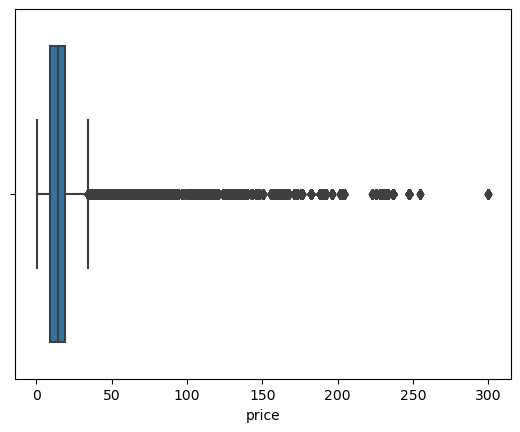

In [39]:
#affichage d'un bloxplot
sns.boxplot(total_jointure['price'])

Il y a donc 679353 valeurs, le prix minimum est de 0,62€ alors que pour le maximum le prix est de 300€. L'écart type est de 18,3€. La moyenne est de 17,5€. Elle est différente de la médiane qui est de 14€. 
On voit bien sur le boxplot le Q1, Q3 et la médiane, les valeurs au-dessus de Q3 sont considérées comme des outliers.

# <a name="C3">P2 - Analyse des données</a>

# <a name="C6">Analyse indicateurs ventes</a>

In [40]:
total_jointure.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967.0,0_1316,2021-12-29 09:11:18.860592,s_141762,7.2,0.0
1,c_4410,f,1967.0,0_1316,2022-03-29 09:11:18.860592,s_186233,7.2,0.0
2,c_4410,f,1967.0,0_1316,2022-05-29 09:11:18.860592,s_215758,7.2,0.0
3,c_3654,f,1978.0,0_1316,2021-11-26 03:51:34.068872,s_125143,7.2,0.0
4,c_3654,f,1978.0,0_1316,2022-08-26 03:51:34.068872,s_258546,7.2,0.0


In [41]:
#chiffre d'affaire par produit avec un global ensuite
ca_total = total_jointure['price'].sum()
ca_total_arr = round(ca_total)
print("Le chiffre d'affaires total est de", f"{ca_total_arr}", "€")

Le chiffre d'affaires total est de 11855936 €


In [42]:
#garder uniquement les infos qui m'intéresse pour les dates
total_jointure['année'] = total_jointure['date'].dt.year
total_jointure['mois'] = total_jointure['date'].dt.month
total_jointure['jour'] = total_jointure['date'].dt.day
total_jointure =total_jointure.drop(['date'], axis = 1)

C:\Users\Jonathan.Gourville\AppData\Local\Temp\ipykernel_7612\1958875508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_jointure['année'] = total_jointure['date'].dt.year
C:\Users\Jonathan.Gourville\AppData\Local\Temp\ipykernel_7612\1958875508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_jointure['mois'] = total_jointure['date'].dt.month
C:\Users\Jonathan.Gourville\AppData\Local\Temp\ipykernel_7612\1958875508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [43]:
#Ca par année 
#2021
ca_annee_2021 = total_jointure.loc[total_jointure['année'] == 2021 ]
ca_annee_2021 = ca_annee_2021['price'].sum()
ca_annee_2021_arr = round(ca_annee_2021)
print("Le chiffre d'affaires total de 2021 est de", f"{ca_annee_2021_arr}", "€")
#2022
ca_annee_2022 = total_jointure.loc[total_jointure['année'] == 2022 ]
ca_annee_2022 = ca_annee_2022['price'].sum()
ca_annee_2022_arr = round(ca_annee_2022)
print("Le chiffre d'affaires total de 2022 est de", f"{ca_annee_2022_arr}", "€")
#2023
ca_annee_2023 = total_jointure.loc[total_jointure['année'] == 2023 ]
ca_annee_2023 = ca_annee_2023['price'].sum()
ca_annee_2023_arr = round(ca_annee_2023)
print("Le chiffre d'affaires total de 2023 est de", f"{ca_annee_2023_arr}", "€")

Le chiffre d'affaires total de 2021 est de 4771696 €
Le chiffre d'affaires total de 2022 est de 6109881 €
Le chiffre d'affaires total de 2023 est de 974360 €


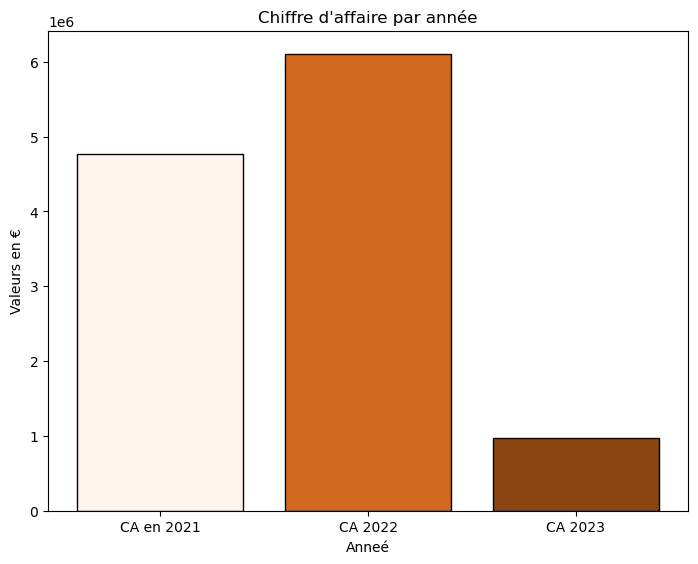

In [44]:
#grapique ca par année
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

etiquettes = ['CA en 2021', 'CA 2022','CA 2023']
valeurs = [4771696,6109881,974360]

# Affichage des données
ax.bar(etiquettes, valeurs,color=[
       'seashell', 'chocolate','saddlebrown'], edgecolor="black")


plt.title("Chiffre d'affaire par année")  # Titre du graphique
plt.ylabel('Valeurs en €')  # Titre de l'axe y
plt.xlabel('Anneé') #Titre de l'axe x
plt.show()  # Affichage d'une courbe

On peut constater que notre meilleure année sur les 3 est 2022 mais l'année 2023 n'étant pas terminer, il n'est pas possible de mettre 2023 dans la comparaison. Il serait plus judicieux de choisir un autre moyen de comparaison que par année.

In [45]:
#CA par mois. La dernière transaction de 2023 est en fev alors on va comparer les deux mois de chaque année
#ca mois de fev de 2022
ca_fev_2022 = total_jointure.loc[(total_jointure['année'] == 2022) & (total_jointure['mois'] == 2.0) ]
ca_fev_2022 = ca_fev_2022['price'].sum()
print("Le chiffre d'affaire du mois de Février 2022 est",f"{ca_fev_2022}", "€")
#ca mois de fev 2023
ca_fev_2023 = total_jointure.loc[(total_jointure['année'] == 2023) & (total_jointure['mois'] == 2.0)]
ca_fev_2023 = ca_fev_2023['price'].sum()
print("Le chiffre d'affaire du mois de Février 2023 est",f"{ca_fev_2023}", "€")

Le chiffre d'affaire du mois de Février 2022 est 535681.39 €
Le chiffre d'affaire du mois de Février 2023 est 456749.69 €


Ces indicateurs de chiffre d'affaire sont intéressantes mais nous ne savont pas ici combien de vente nous avons fait sur ces mois pour que la comparaison est un peu plus de sens

In [46]:
#nombre de vente sur le mois de fev 2022
vente_fev_2022 = total_jointure.loc[(total_jointure['année'] == 2022) & (total_jointure['mois'] == 2.0) ]
vente_fev_2022 = vente_fev_2022['session_id'].count()
print("Les ventes du mois de Février 2022 est de", f"{vente_fev_2022}")
vente_fev_2023 = total_jointure.loc[(total_jointure['année'] == 2023) & (total_jointure['mois'] == 2.0)]
vente_fev_2023 = vente_fev_2023['session_id'].count()
print("Les ventes du mois de Février 2023 est de" , f"{vente_fev_2023}")

Les ventes du mois de Février 2022 est de 29605
Les ventes du mois de Février 2023 est de 25552


On peut voir que les nombres de ventes sont assez similaires pour les deux mois ( Février 2022 = 29605 / Février 2023 = 25552) mais que le chiffre d'affaire à environ 78 932€ de différence.

Text(0.5, 1.0, 'Ventes mensuelle')

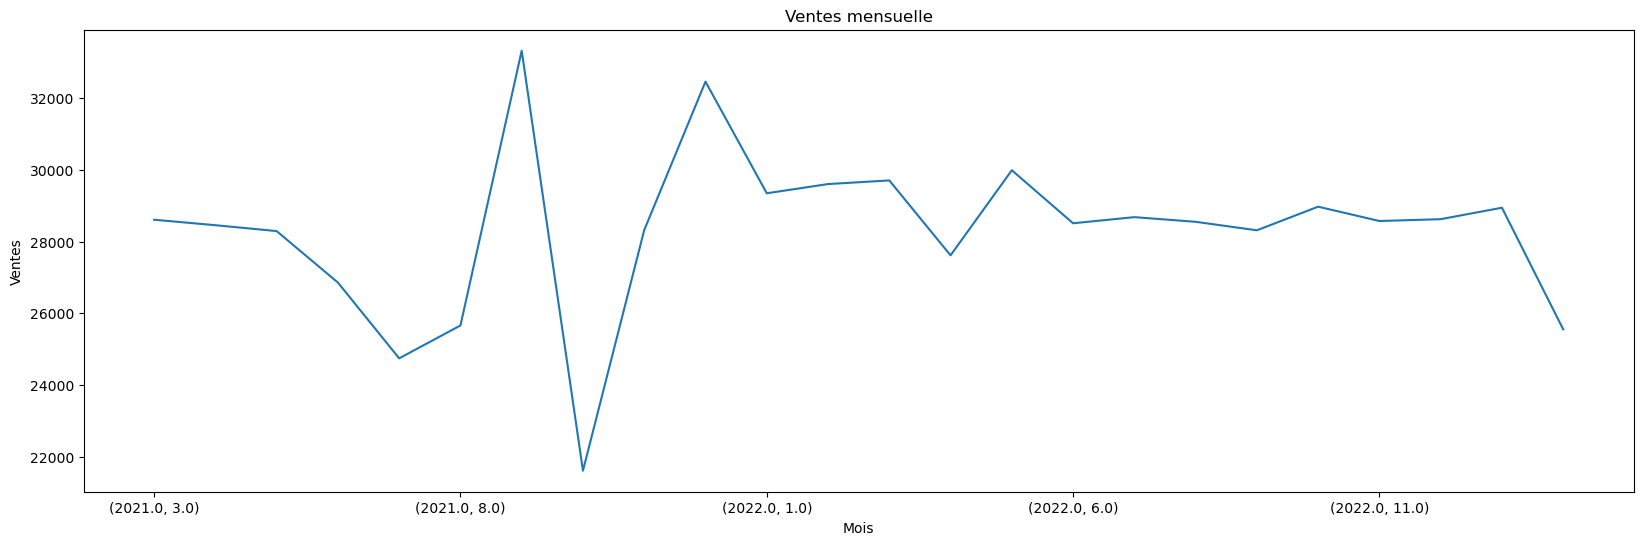

In [47]:
#calcul des ventes mensuelles
vente_mensuelle = total_jointure.groupby(['année','mois'])['session_id'].count()
#grap représentant les ventes mensuelles
plt.figure(figsize =(20,6))
vente_mensuelle.plot() #représentation des ventes mensuellees
plt.xlabel("Mois")
plt.ylabel("Ventes")
plt.title("Ventes mensuelle")

Text(0.5, 1.0, "Chiffres d'affaires mensuel")

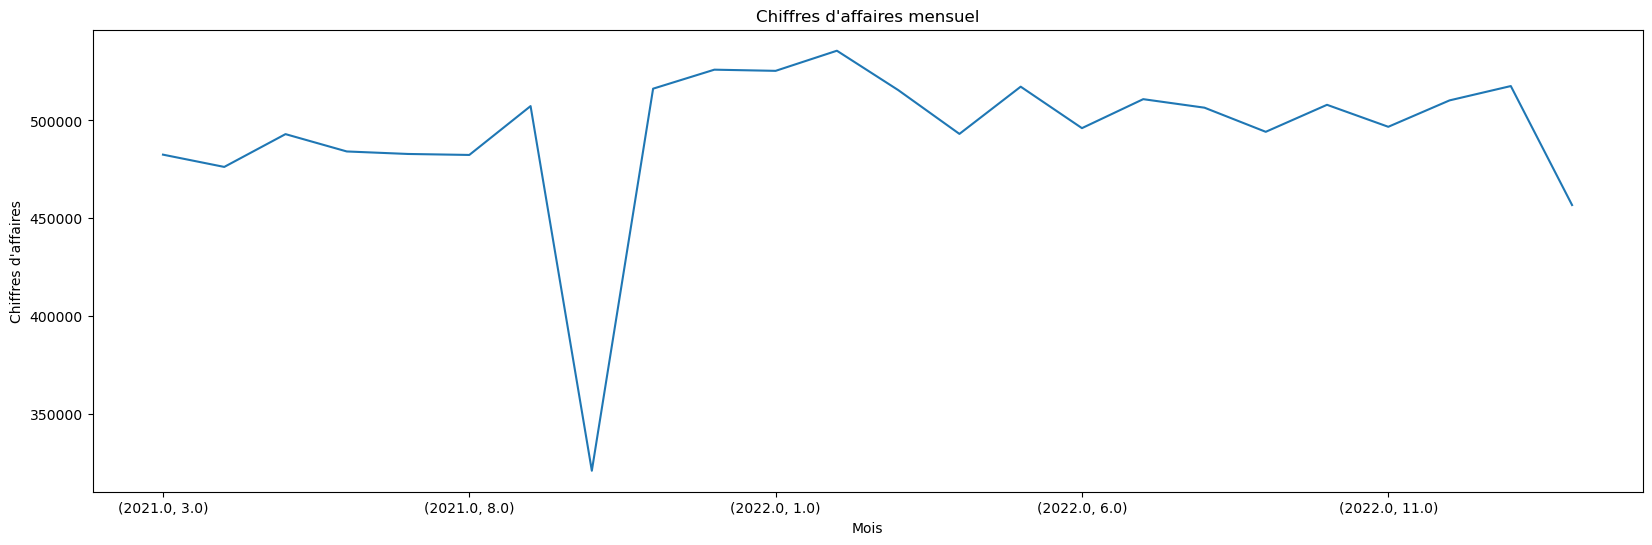

In [48]:
#calcul du Ca mensuel
ca_mensuel = total_jointure.groupby(['année','mois'])['price'].sum()
#grap représentant les ventes mensuelles
plt.figure(figsize =(20,6))
ca_mensuel.plot() #représentation des ventes mensuellees
plt.xlabel("Mois")
plt.ylabel("Chiffres d'affaires")
plt.title("Chiffres d'affaires mensuel")

On constate une baisse des ventes entre Août 2021 et Janvier 2022, et aussi une baisse du nombre de ventes. 

In [49]:
#moyenne mobile du CA 
ca_mensuel.rolling(3).mean()

année   mois
2021.0  3.0               NaN
        4.0               NaN
        5.0     483934.356667
        6.0     484477.013333
        7.0     486685.746667
        8.0     483136.183333
        9.0     490870.206667
        10.0    436867.976667
        11.0    448165.620000
        12.0    454374.503333
2022.0  1.0     522547.926667
        2.0     529019.180000
        3.0     525545.583333
        4.0     514795.536667
        5.0     508665.886667
        6.0     502172.430000
        7.0     508093.830000
        8.0     504512.080000
        9.0     503884.876667
        10.0    502923.100000
        11.0    499665.646667
        12.0    505023.980000
2023.0  1.0     508221.583333
        2.0     494879.870000
Name: price, dtype: float64

<AxesSubplot:title={'center':"Moyenne mobile chiffre d'affaire"}, xlabel='année,mois', ylabel="Chiffre d'affaire">

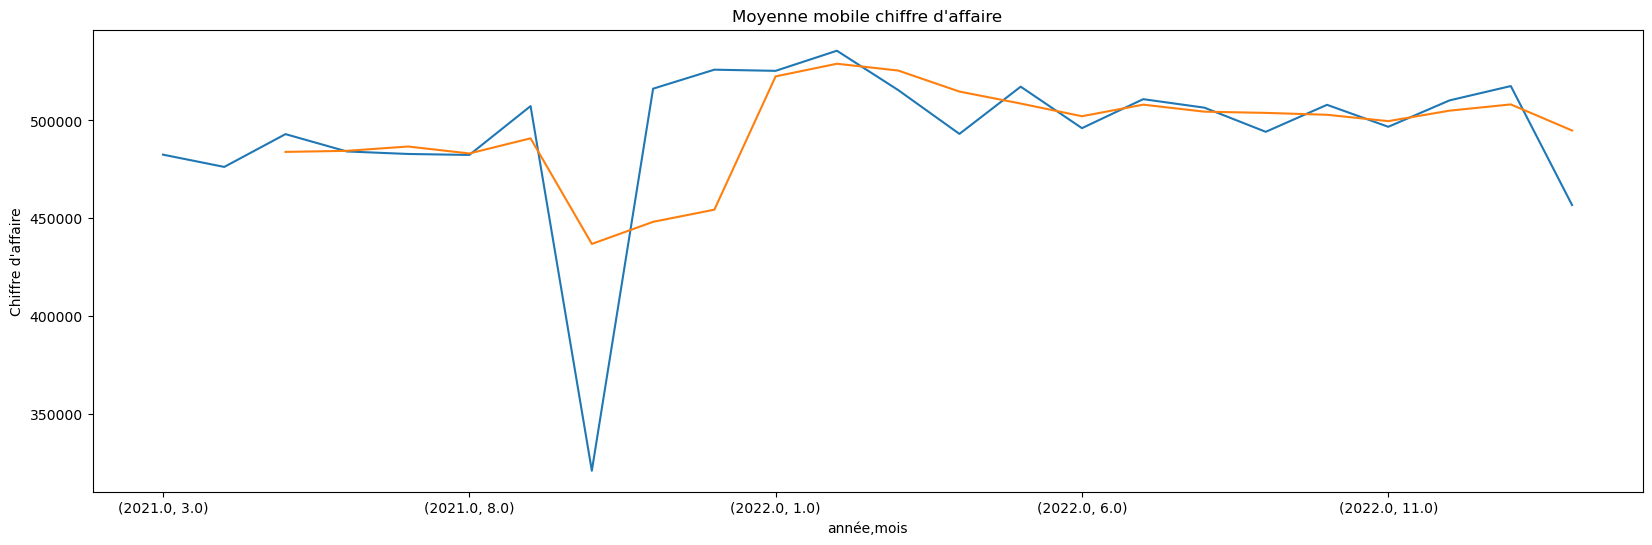

In [50]:
#Représentation de la moyenne mobile en chiffre d'affaire
plt.figure(figsize=(20, 6))
#mise en forme de mon graph
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaire")
plt.title("Moyenne mobile chiffre d'affaire")
 
#affichage de mon graphique de la moyenne mobile
ca_mensuel.plot()
ca_mensuel.rolling(3).mean().plot()

Les moyennes mobiles sont utilisé pour des tendances, fin de tendances ou début d'une autre. Elle ne peut-être utilisé pour de la projection.
Nous avons comme tendance a une stabilité et légere augmentation, et il y a bien eu un accident au mois d'octobre.

In [51]:
#vente par catégorie
#categ 0 
vente_categ0 = total_jointure.loc[(total_jointure['categ'] == 0)]
vente_categ0 = vente_categ0.groupby(['année','mois','categ'])['session_id'].count()
#categ 1
vente_categ1 = total_jointure.loc[(total_jointure['categ'] == 1)]
vente_categ1 = vente_categ1.groupby(['année','mois','categ'])['session_id'].count()
#categ 2
vente_categ2 = total_jointure.loc[(total_jointure['categ'] == 2)]
vente_categ2 = vente_categ2.groupby(['année','mois','categ'])['session_id'].count()

Text(0.5, 1.0, "Evolution mensuelle du chiffre d'affaires par catégorie")

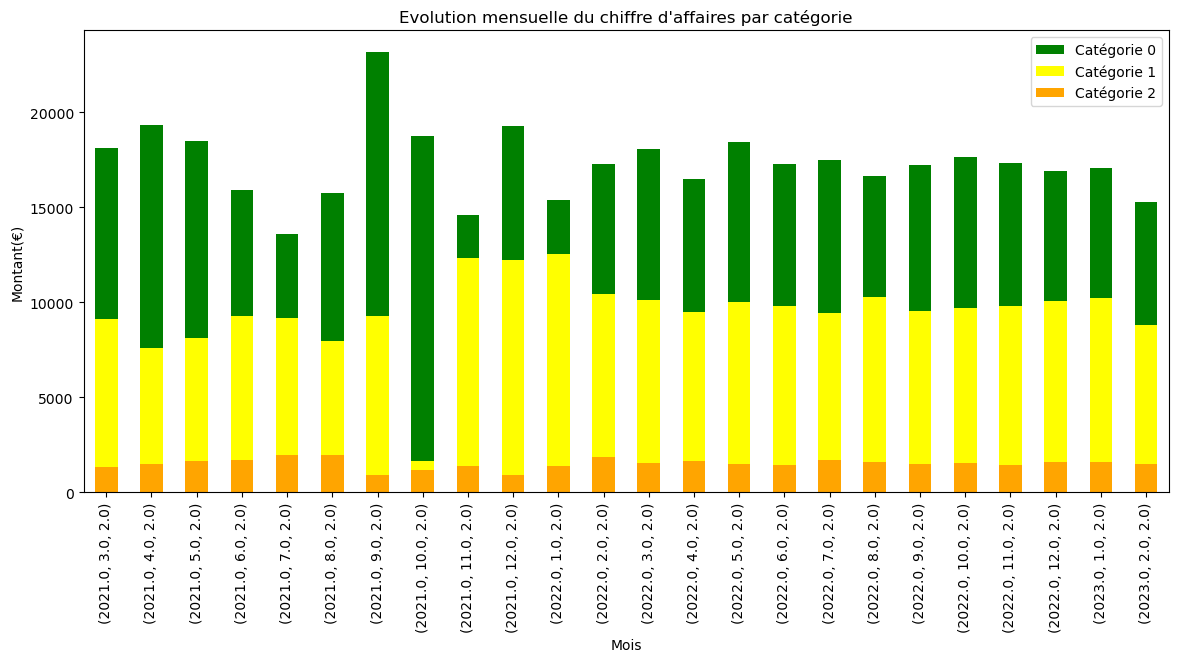

In [52]:
#voir si on peut mettre autre chose comme indicateur, par catégorie par exemple 
#ventes par catég
vente_categ0.plot.bar(figsize=(14,6), color ="green")
vente_categ1.plot.bar(figsize=(14,6), color ="yellow")
vente_categ2.plot.bar(figsize=(14,6), color ="orange")
plt.legend(["Catégorie 0","Catégorie 1","Catégorie 2"])
plt.xlabel("Mois")
plt.ylabel("Montant(€)")
plt.title("Evolution mensuelle du chiffre d'affaires par catégorie")

In [53]:
#ca par catégorie
#categ 0 
ca_categ0 = total_jointure.loc[(total_jointure['categ'] == 0)]
ca_categ0 = ca_categ0.groupby(['année','mois','categ'])['price'].sum()
#categ 1
ca_categ1 = total_jointure.loc[(total_jointure['categ'] == 1)]
ca_categ1 = ca_categ1.groupby(['année','mois','categ'])['price'].sum()
#categ 2
ca_categ2 = total_jointure.loc[(total_jointure['categ'] == 2)]
ca_categ2 = ca_categ2.groupby(['année','mois','categ'])['price'].sum()

Text(0.5, 1.0, "Evolution mensuelle du chiffre d'affaires par catégorie")

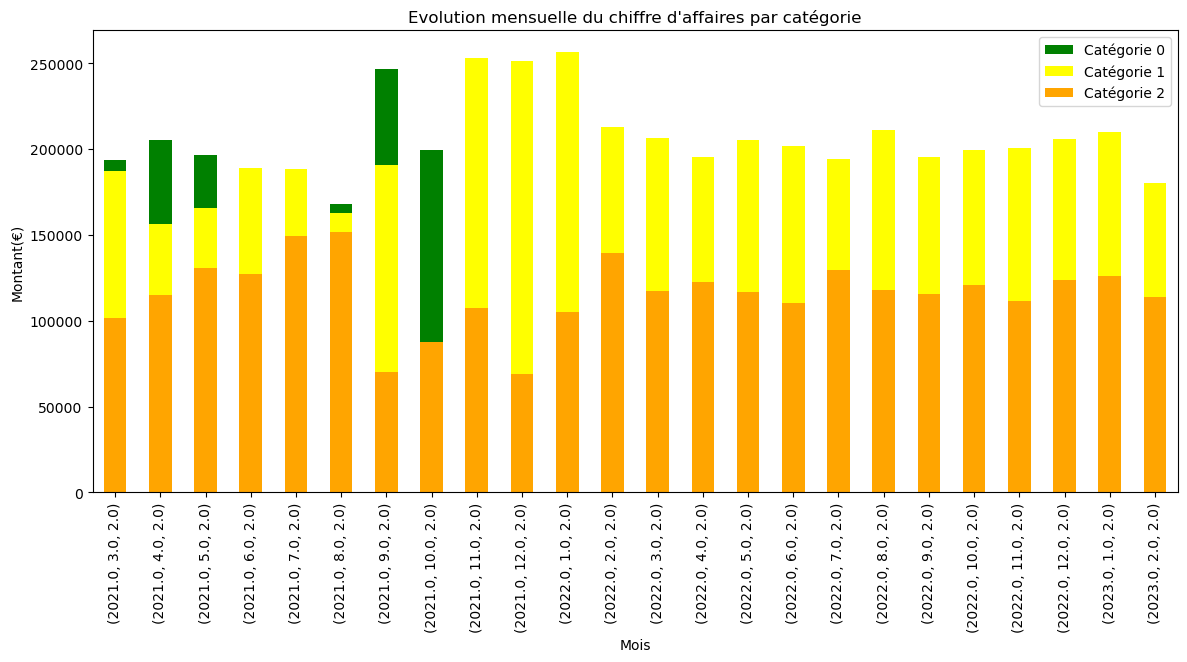

In [54]:
#ca par categ
ca_categ0.plot.bar(figsize=(14,6), color ="green")
ca_categ1.plot.bar(figsize=(14,6), color ="yellow")
ca_categ2.plot.bar(figsize=(14,6), color ="orange")
plt.legend(["Catégorie 0","Catégorie 1","Catégorie 2"])
plt.xlabel("Mois")
plt.ylabel("Montant(€)")
plt.title("Evolution mensuelle du chiffre d'affaires par catégorie")

On constate que les livres de catégorie 1 subissent une vrai baisse en terme de vente et de chiffre d'affaire. 

# <a name="C7">Références</a>

In [55]:
#Meilleures et pires ventes
nbr_ventes_ref = total_jointure.groupby(["id_prod"])["session_id"].count()
#Renvoie les 10 références les plus vendues nlargest
print("Les références les plus vendues sont \n", f"{nbr_ventes_ref.nlargest(10)}")

Les références les plus vendues sont 
 id_prod
1_369    2252
1_417    2189
1_414    2180
1_498    2128
1_425    2096
1_403    1960
1_412    1951
1_413    1945
1_406    1939
1_407    1935
Name: session_id, dtype: int64


In [56]:
#chiffre d'affaire des tops références
ca_ref = total_jointure.groupby(["id_prod"])["price"].sum()
print("Les références avec le plus de chiffre d'affaire sont \n", f"{ca_ref.nlargest(10)}")

Les références avec le plus de chiffre d'affaire sont 
 id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
1_395    54356.25
1_369    54025.48
2_110    53846.25
2_39     53060.85
2_166    52449.12
Name: price, dtype: float64


Les produits les plus vendus appartiennent à la catégorie 1 et ceux les moins vendu à la catégorie 0

In [57]:
#références par catégorie
repart_categorie = total_jointure.groupby(["categ"])["id_prod"].count()
print("La répartition des références par catégorie est \n", f"{repart_categorie}")
#prix moyen par catégorie
prix_categ = total_jointure.groupby(["categ"])['price'].mean()
print("Le prix moyen d'un livre selon sa catégorie est de \n", f"{prix_categ}")
#ca par catégorie
ca_categ = total_jointure.groupby(["categ"])["price"].sum()
print("Le chiffre d'affaire par catégorie est de \n", f"{ca_categ}")

La répartition des références par catégorie est 
 categ
0.0    415680
1.0    227169
2.0     36483
Name: id_prod, dtype: int64
Le prix moyen d'un livre selon sa catégorie est de 
 categ
0.0    10.637843
1.0    20.485730
2.0    76.207412
Name: price, dtype: float64
Le chiffre d'affaire par catégorie est de 
 categ
0.0    4421938.76
1.0    4653722.69
2.0    2780275.02
Name: price, dtype: float64


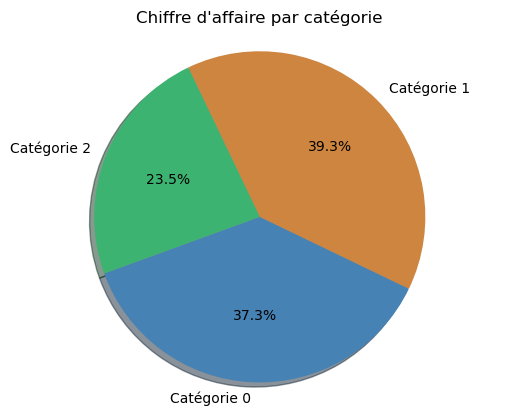

In [58]:
#graph
labels = 'Catégorie 0', 'Catégorie 1', 'Catégorie 2'
sizes = ca_categ
colors = ['steelblue', 'peru', 'mediumseagreen',]
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=200)
plt.axis('equal')
plt.title("Chiffre d'affaire par catégorie")
plt.show()

Le prix moyen d'un livre est marqué entre les catégories, en particulier pour la catégorie 2 (76€ de prix moyen). Nos meilleurs ventes se font sur la catégorie 1. (20€ de prix moyen)  

# <a name="C8">Clients</a>

In [59]:
#Meilleurs clients
zoom_client = total_jointure.groupby(["client_id"])["price"].sum()
#Renvoie les clients qui ont le plus dépensés
print("Les références les plus vendues sont", f"{zoom_client.nlargest(10)}")

Les références les plus vendues sont client_id
c_1609    324033.35
c_4958    289760.34
c_6714    153658.86
c_3454    113667.90
c_3263      5276.87
c_1570      5271.62
c_2899      5214.05
c_2140      5208.82
c_7319      5155.77
c_8026      5092.57
Name: price, dtype: float64


In [60]:
#Selection des clients sans les meilleurs
zoom_client2 =pd.DataFrame(zoom_client)
zoom_client2 = zoom_client2[zoom_client2["price"] < 100000 ]
zoom_client2 = pd.Series(zoom_client2["price"])
#zoom_client2 = pd.DataFrame(zoom_client2)
print(zoom_client2.nlargest(10))

client_id
c_3263    5276.87
c_1570    5271.62
c_2899    5214.05
c_2140    5208.82
c_7319    5155.77
c_8026    5092.57
c_7959    5085.45
c_7421    5050.20
c_5263    5006.85
c_1422    4993.55
Name: price, dtype: float64


In [61]:
#profil meilleur client
c_1609 = total_jointure.loc[total_jointure["client_id"] == "c_1609"]
print(c_1609)

       client_id sex   birth id_prod session_id  price  categ   année  mois  \
127       c_1609   m  1980.0  0_1316   s_128411   7.20    0.0  2021.0  12.0   
128       c_1609   m  1980.0  0_1316   s_230557   7.20    0.0  2022.0   6.0   
129       c_1609   m  1980.0  0_1316   s_233383   7.20    0.0  2022.0   7.0   
130       c_1609   m  1980.0  0_1316    s_43751   7.20    0.0  2021.0   6.0   
131       c_1609   m  1980.0  0_1316   s_336585   7.20    0.0  2023.0   2.0   
...          ...  ..     ...     ...        ...    ...    ...     ...   ...   
678792    c_1609   m  1980.0    0_88    s_47243   8.30    0.0  2021.0   6.0   
678794    c_1609   m  1980.0  0_1820   s_301633  22.30    0.0  2022.0  11.0   
678795    c_1609   m  1980.0  0_1820    s_52690  22.30    0.0  2021.0   6.0   
678800    c_1609   m  1980.0     0_3   s_247366  28.99    0.0  2022.0   8.0   
678801    c_1609   m  1980.0     0_3    s_84079  28.99    0.0  2021.0   9.0   

        jour  
127      2.0  
128     28.0  
129   

Notre meilleur client est un homme de 43 ans, qui a acheté plusieurs fois les mêmes livres. Il peut s'agir de grossistes, revendeurs.

In [62]:
#Nombre d'achat par client, montant moyen d'achat par client toute catégorie comprises
nbr_achat_moyen = total_jointure.groupby(["client_id"])["session_id"].count().mean()
montant_achat_moyen = total_jointure.groupby(["client_id"])["price"].sum().mean()
print("Le nombre d'achat moyen par client est de",f"{round(nbr_achat_moyen, 2)}")
print("Le montant d'achat moyen par client est de", f"{round(montant_achat_moyen, 2)}€")

Le nombre d'achat moyen par client est de 78.78
Le montant d'achat moyen par client est de 1374.92€


Indice de gini: 0.448


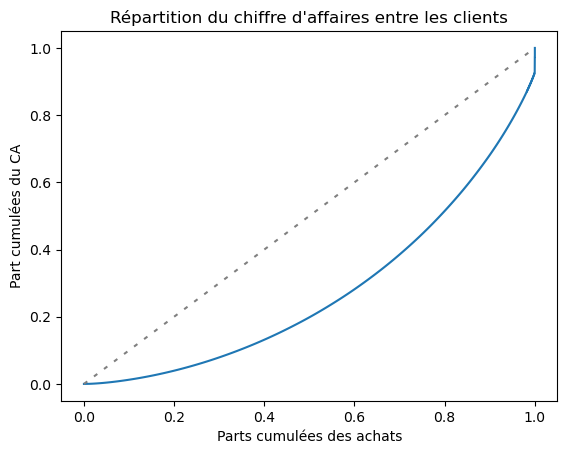

In [63]:
#courb de lorenz, répartition du CA par clients
lorenz_ca_client = np.cumsum(np.sort(zoom_client)) / zoom_client.sum()
lorenz_ca_client = np.append([0],lorenz_ca_client)
#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(np.linspace(0,1,len(lorenz_ca_client)), lorenz_ca_client, drawstyle="steps-post")
plt.plot(np.linspace(0,1,len(lorenz_ca_client)), np.linspace(0,1,len(lorenz_ca_client)), color="grey", dashes=[2,4])
plt.ylabel("Part cumulées du CA")
plt.xlabel('Parts cumulées des achats')
plt.title("Répartition du chiffre d'affaires entre les clients")
#Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
aire_ss_courbe_ca_client = lorenz_ca_client[:-1].sum()/len(lorenz_ca_client)
#Surface entre la première bissectrice et le courbe de Lorenz
s_ca_client = 0.5 - aire_ss_courbe_ca_client 
gini_ca_client = 2*s_ca_client 
print("Indice de gini:", f"{round(gini_ca_client,3)}")

La courbe de Lorenz est une représentation graphique de la répartition d'une variable. L'axe des abscisses représente le pourcentage total des achats. L'axe des ordonnées montre le pourcentage cumulé du CA. La ligne en pointillé représente la droite d'équidistribution, et la la courbe représente la courbe de lorenz.
La droite d'équidistribution représente la distribution parfaitement égalitaire d'une variable (revenu, salaire, patrimoine). Elle sert de référence pour ce qui devrait être, sans la présence d'inégalités.
on peut calculer le coefficient de Gini, qui mesure l'inégalité de revenu ou de patrimoine pour une population donnée.

L'indice de gini est aussi proche de 0 que 1 (0.5), cela signifie que la répartition du chiffre d'affaire entre client n'est pas totalement égalitaire mais n'est pas non plus inégale

Indice de gini: 0.404


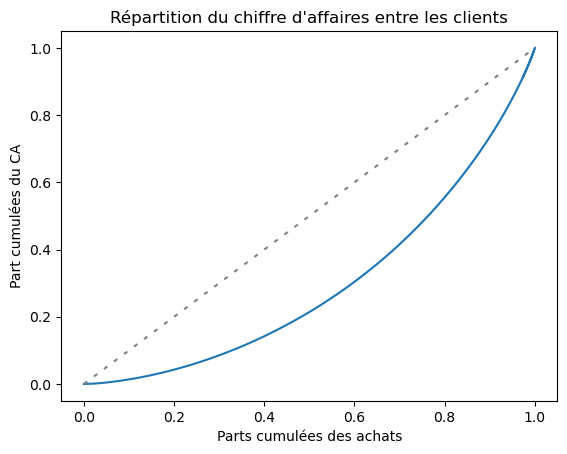

In [64]:
#refaire une courbe de lorenz sans les 4 gros clients, et analyse si ceux ci crée l'inégalité ou pas. 
#C_1609, C_4958, C_6714, C_3454
#courb de lorenz, répartition du CA par clients
lorenz_ca_client1 = np.cumsum(np.sort(zoom_client2)) / zoom_client2.sum()
lorenz_ca_client1 = np.append([0],lorenz_ca_client1)
#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(np.linspace(0,1,len(lorenz_ca_client1)), lorenz_ca_client1, drawstyle="steps-post")
plt.plot(np.linspace(0,1,len(lorenz_ca_client1)), np.linspace(0,1,len(lorenz_ca_client1)), color="grey", dashes=[2,4])
plt.ylabel("Part cumulées du CA")
plt.xlabel('Parts cumulées des achats')
plt.title("Répartition du chiffre d'affaires entre les clients")
#Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
aire_ss_courbe_ca_client = lorenz_ca_client1[:-1].sum()/len(lorenz_ca_client1)
#Surface entre la première bissectrice et le courbe de Lorenz
s_ca_client = 0.5 - aire_ss_courbe_ca_client 
gini_ca_client = 2*s_ca_client 
print("Indice de gini:", f"{round(gini_ca_client,3)}")

Sans nos 4 plus gros clients, l'indice de gini est aussi proche de 0 que 1 (0.5), cela signifie que la répartition du chiffre d'affaire entre client n'est pas totalement égalitaire mais n'est pas non plus inégale.

In [65]:
#Nombre de sessions
nbr_session_achat = total_jointure['session_id'].nunique() #renvoie le nombre de valeur unique pour chaque colonne, recherche par colonne et renvoie le nombre de valeurs unique par ligne.
print("Le nombre de session d'achat est de", f"{nbr_session_achat}")

Le nombre de session d'achat est de 342315


In [66]:
#Montant d'achat moyen par sessions
montant_moyen_achat_sess = total_jointure.groupby(['session_id'])["price"].mean()
montant_moyen_achat_sess_1 = montant_moyen_achat_sess.mean()
print("Une session abouti généralement à", f"{round(montant_moyen_achat_sess_1,2)}€ d'achat")

Une session abouti généralement à 19.15€ d'achat


In [67]:
#Montant d'achat moyen par session et par catégorie
mtt_achat_session_categ = total_jointure.groupby(["categ",])["session_id"].count()
print("Le prix moyen d'un livre selon sa catégorie est de \n", f"{mtt_achat_session_categ}")

Le prix moyen d'un livre selon sa catégorie est de 
 categ
0.0    415680
1.0    227169
2.0     36483
Name: session_id, dtype: int64


Il y a eu 342315 sessions avec plusieurs transactions par session. Une session abouti en moyenne à 19,2€ d'achat

# <a name="C9">Analyse Clientéle</a>

In [68]:
#Genre et répartition de nos clients
repart_genre = total_jointure.groupby(["sex"])["client_id"].count()
print("La répartition des genre est de \n", f"{repart_genre}")

La répartition des genre est de 
 sex
f    338414
m    340941
Name: client_id, dtype: int64


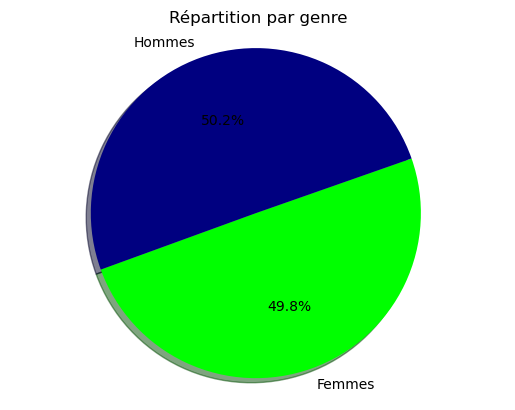

In [69]:
#graph représentant la répartition des genres
labels = 'Femmes', 'Hommes'
sizes = repart_genre
colors = ['lime', 'navy',]
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=200)
plt.axis('equal')
plt.title("Répartition par genre")
plt.show()

In [70]:
#dépense par genre
repart_depense_genre = total_jointure.groupby(['sex'])['price'].sum()
print("La répartition par genre de dépense est \n", f"{repart_depense_genre}")
#achat par genre
repart_achat_genre = total_jointure.groupby(["sex"])["session_id"].count()
print("La répartition par genre d'achat est \n", f"{repart_achat_genre}")
#montant moyen des achats par genre
repart_montant_moyen = total_jointure.groupby(["sex"])["price"].mean()
print("Le montant moyen d'achat par genre est \n", f"{repart_montant_moyen}")

La répartition par genre de dépense est 
 sex
f    5860851.96
m    5995084.51
Name: price, dtype: float64
La répartition par genre d'achat est 
 sex
f    338402
m    340930
Name: session_id, dtype: int64
Le montant moyen d'achat par genre est 
 sex
f    17.319200
m    17.584503
Name: price, dtype: float64


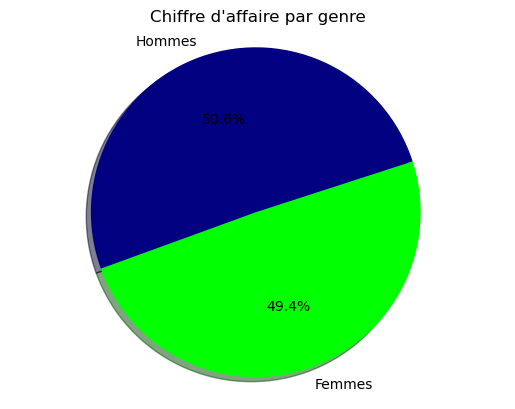

In [71]:
#graphique répartition chiffre d'affaire par genre
labels = 'Femmes', 'Hommes'
sizes = repart_depense_genre
colors = ['lime', 'navy',]
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=200)
plt.axis('equal')
plt.title("Chiffre d'affaire par genre")
plt.show()

# <a name="C10">Analyse Bivarié</a>

In [72]:
total_jointure

,client_id,sex,birth,id_prod,session_id,price,categ,année,mois,jour
0,c_4410,f,1967.0,0_1316,s_141762,7.20,0.0,2021.0,12.0,29.0
1,c_4410,f,1967.0,0_1316,s_186233,7.20,0.0,2022.0,3.0,29.0
2,c_4410,f,1967.0,0_1316,s_215758,7.20,0.0,2022.0,5.0,29.0
3,c_3654,f,1978.0,0_1316,s_125143,7.20,0.0,2021.0,11.0,26.0
4,c_3654,f,1978.0,0_1316,s_258546,7.20,0.0,2022.0,8.0,26.0
...,...,...,...,...,...,...,...,...,...,...
679350,c_8138,f,1984.0,0_394,s_116986,2.14,0.0,2021.0,11.0,9.0
679351,c_8138,f,1984.0,0_394,s_250653,2.14,0.0,2022.0,8.0,9.0
679352,c_8138,f,1984.0,0_394,s_176587,2.14,0.0,2022.0,3.0,9.0
679353,c_8327,m,1972.0,0_394,s_230707,2.14,0.0,2022.0,6.0,28.0


array([[<AxesSubplot:xlabel='birth', ylabel='birth'>,
        <AxesSubplot:xlabel='price', ylabel='birth'>,
        <AxesSubplot:xlabel='categ', ylabel='birth'>,
        <AxesSubplot:xlabel='année', ylabel='birth'>,
        <AxesSubplot:xlabel='mois', ylabel='birth'>,
        <AxesSubplot:xlabel='jour', ylabel='birth'>],
       [<AxesSubplot:xlabel='birth', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='categ', ylabel='price'>,
        <AxesSubplot:xlabel='année', ylabel='price'>,
        <AxesSubplot:xlabel='mois', ylabel='price'>,
        <AxesSubplot:xlabel='jour', ylabel='price'>],
       [<AxesSubplot:xlabel='birth', ylabel='categ'>,
        <AxesSubplot:xlabel='price', ylabel='categ'>,
        <AxesSubplot:xlabel='categ', ylabel='categ'>,
        <AxesSubplot:xlabel='année', ylabel='categ'>,
        <AxesSubplot:xlabel='mois', ylabel='categ'>,
        <AxesSubplot:xlabel='jour', ylabel='categ'>],
       [<AxesSubplot:xlabel='bi

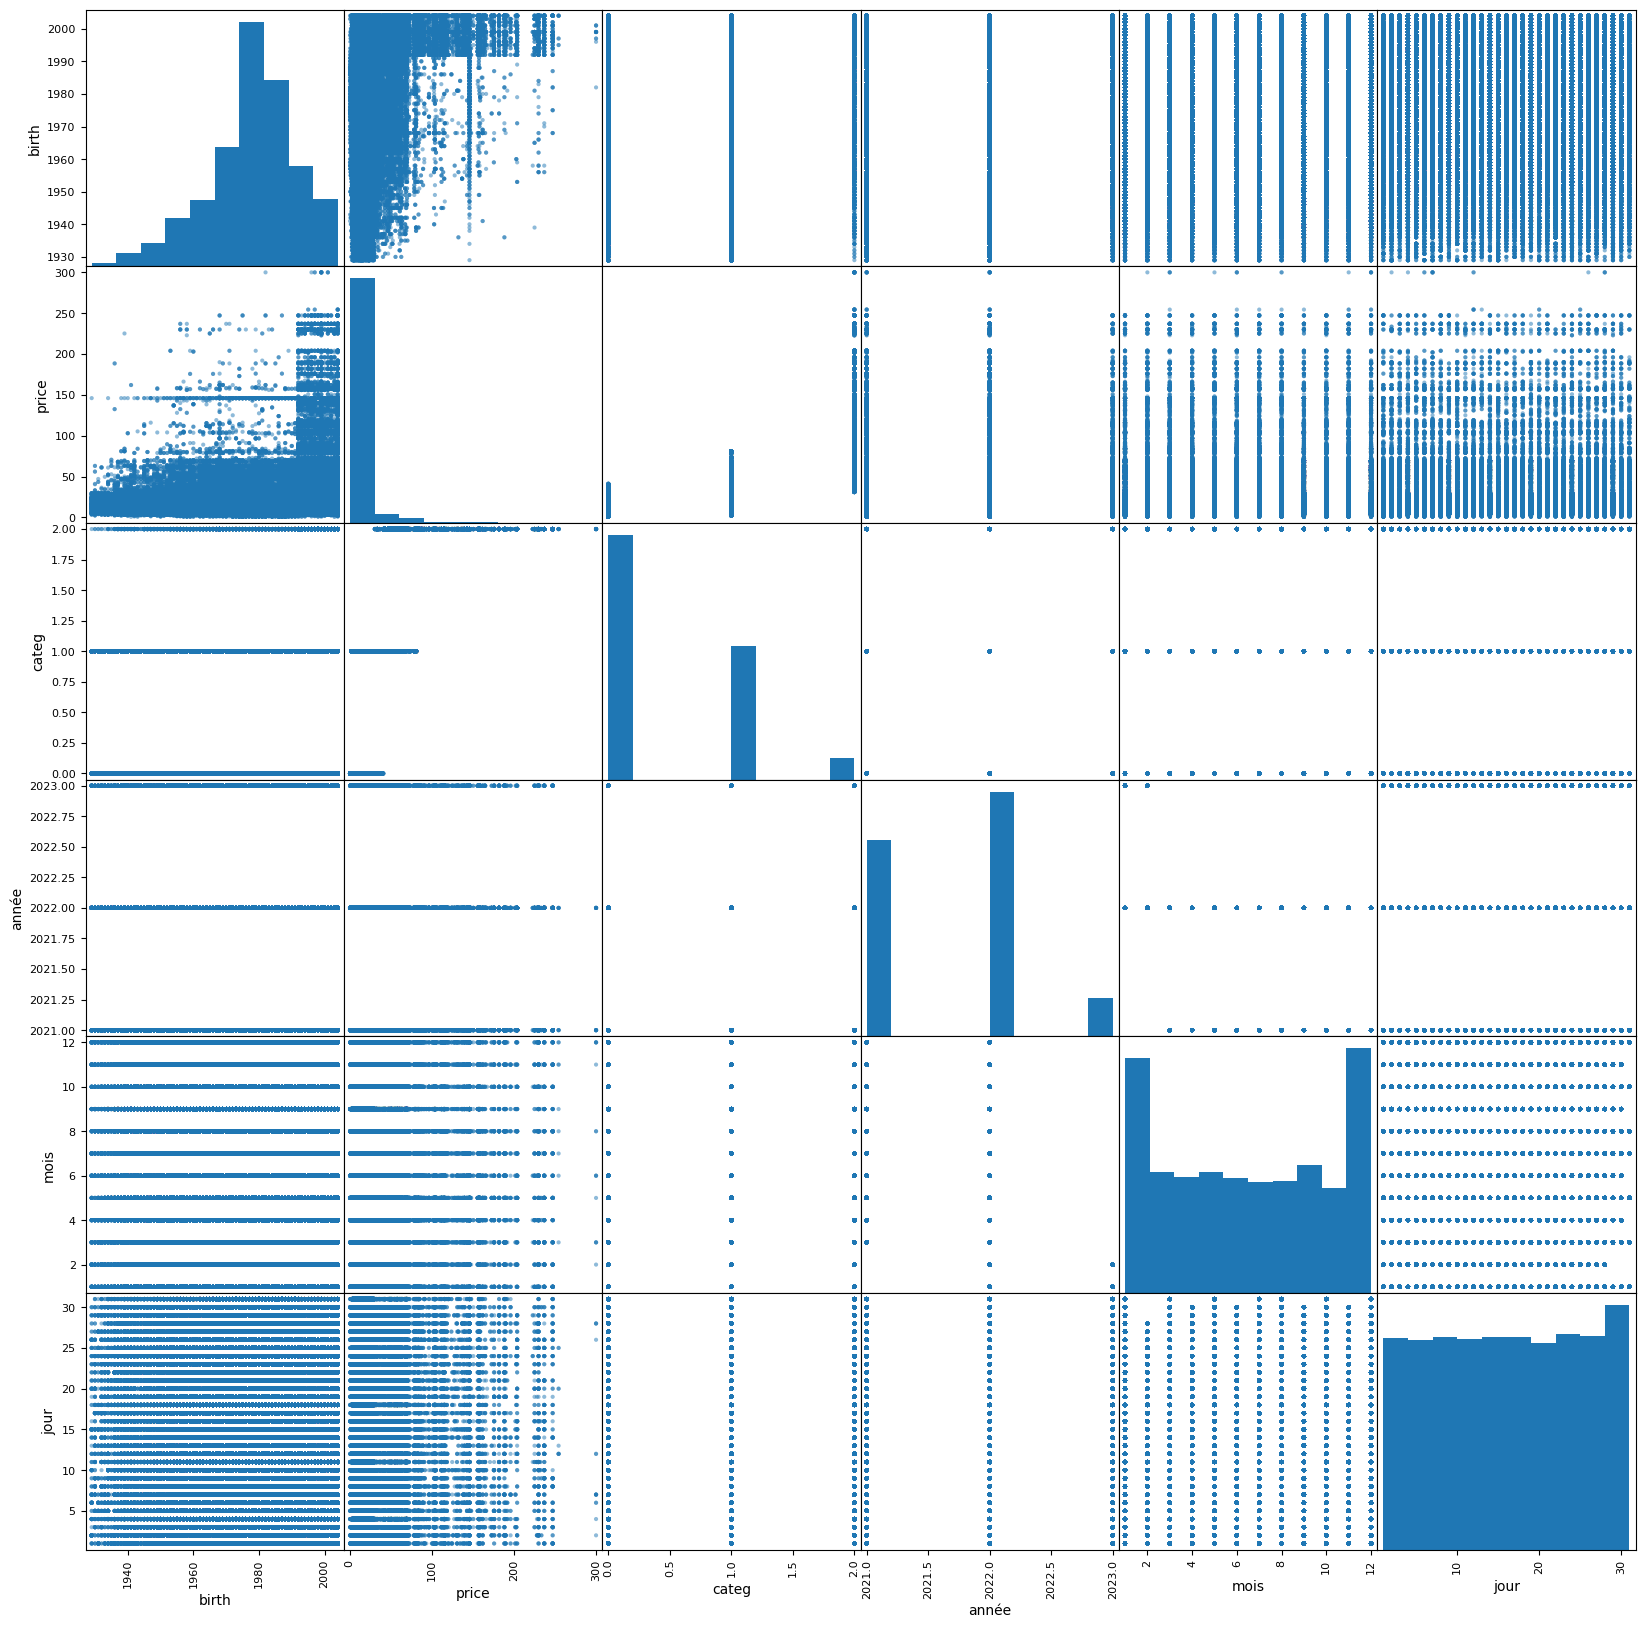

In [73]:
#matrice de dispersion avec plot uniquement sur les variables quantitatives.
pd.plotting.scatter_matrix(total_jointure,figsize=(20,20),grid=True,)

## Genre client et catégories achetées ( Qualitatives )

In [74]:
#Analyse du lien entre genre client et catégories de livres achetés.
t = pd.crosstab(total_jointure["sex"],total_jointure["categ"])
print(t)

categ     0.0     1.0    2.0
sex                         
f      206220  114899  17283
m      209460  112270  19200


<AxesSubplot:xlabel='sex'>

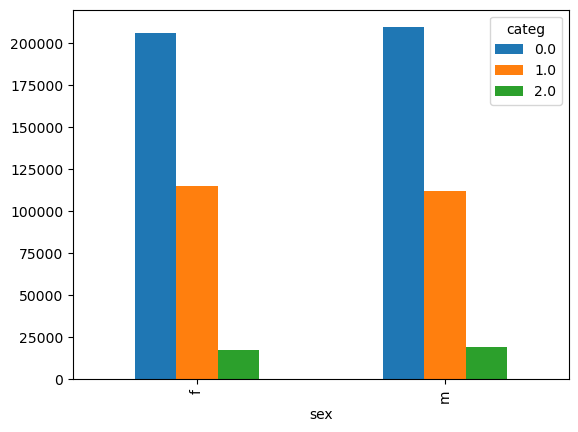

In [75]:
t.plot.bar()

On constate que les 679332 échantillons sont répartis comme suit : 
 - pour la catégorie 0 : 206220 livres ont été achetés par des femmes et 209460 par des hommes
 - pour la catégorie 1 : 114899 livres ont été achetés par des femmes et 112270 par des hommes
 - pour la catégorie 2 : 17283 livres ont été achetés par des femmes et 19200 par des hommes.

In [76]:
#table de contingence avec les sous totaux. 
t1 = pd.crosstab(total_jointure["sex"],total_jointure["categ"], margins = True)
print(t1)

categ     0.0     1.0    2.0     All
sex                                 
f      206220  114899  17283  338402
m      209460  112270  19200  340930
All    415680  227169  36483  679332


<AxesSubplot:xlabel='sex'>

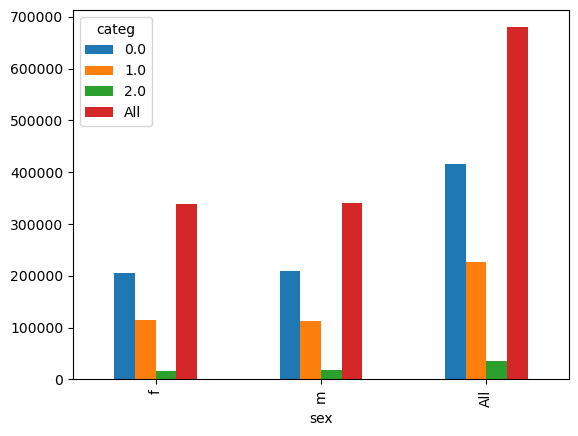

In [77]:
t1.plot.bar()

In [78]:
#Normalisation des fréquences en %
t2 = pd.crosstab(total_jointure["sex"], total_jointure["categ"], normalize = True)
print(t2)
#Le total de ces pourcentages est de 100

categ       0.0       1.0       2.0
sex                                
f      0.303563  0.169135  0.025441
m      0.308332  0.165265  0.028263


<AxesSubplot:xlabel='sex'>

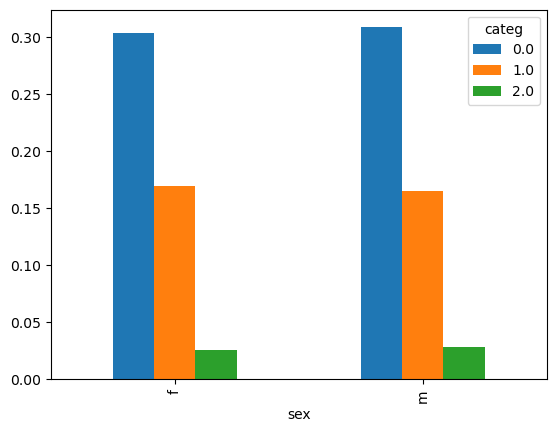

In [79]:
t2.plot.bar()

In [80]:
#Normalisation des fréquences en % sur les sous totaux
t3 = pd.crosstab(total_jointure["sex"], total_jointure["categ"], normalize = "index")
print(t3)

categ       0.0       1.0       2.0
sex                                
f      0.609394  0.339534  0.051072
m      0.614378  0.329305  0.056317


<AxesSubplot:xlabel='sex'>

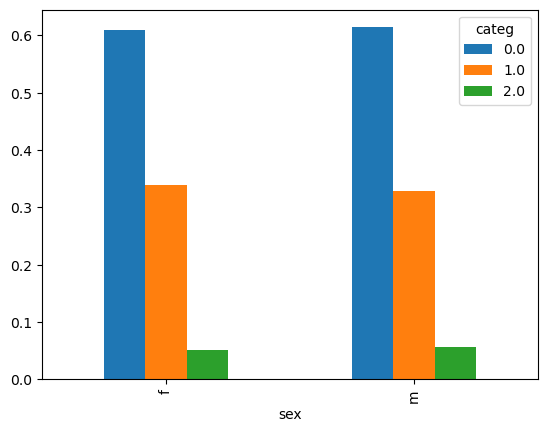

In [81]:
t3.plot.bar()

La catégorie 0 est la plus acheté par les hommes et les femmes, environ 30% d'achat pour les deux genres.

On constate que sur 100% des hommes la plupart achéte des livres de la catégérie 0 (61,4%) et chez les femmes le pourcentage est aussi éleve pour la catégorie 0 (60,9%)

In [82]:
#Normalisation sur le tableau avec les sous totaux
pd.crosstab(total_jointure["sex"], total_jointure["categ"], normalize = "index", margins = True)

categ,0.0,1.0,2.0
sex,,,
f,0.609394,0.339534,0.051072
m,0.614378,0.329305,0.056317
All,0.611895,0.334401,0.053704


In [83]:
#dans ce test du chi_2, on test pour savoir s'il existe une relation entre deux variables ou plus. Test du chi carré pour l'indépendance.
categ_genre = pd.crosstab(total_jointure["sex"], total_jointure["categ"]).astype(object)
cs_chi2 = scipy.stats.chi2_contingency(categ_genre)
print(cs_chi2)
#test chi_2 pour deux variables qualitatives

(147.00253568681114, 1.1989607410166063e-32, 2, array([[207066.56444861, 113161.81769444,  18173.61785695],
       [208613.43555139, 114007.18230556,  18309.38214305]]))


In [84]:
#Test de cramer
#mesure de la force de l'association entre deux variables nominales 
def cramers(categ_genre):
 
    chi2 = scipy.stats.chi2_contingency(categ_genre)[0]
 
    n = sum(categ_genre.sum())
 
    return np.sqrt(chi2 / (n*(min(categ_genre.shape)-1)))
 
   
 
result = cramers(categ_genre)
 
print("Le V de Cramer vaux ",result)

Le V de Cramer vaux  0.014710294817475282


La première valeur (147) est la valeur du chi carré, suivi de la valeur de p, puis vient les degrés de liberté (2), et enfin elle produit les fréquences attendues sous forme de réseau.
chi² = 147 
p = 1,20
degré de liberté = 2

Avec le calcul du V de Cramer, on confirme que l'associaion entre les deux variables sont faible, il est proche de 0, l'association entre les deux variables est faible. Cramer = 0,014

L'hypothèse nulle ici est le lien entre catégorie achetées et genre, mais on peut voir qu'avec le seuil à 5%, nous en sommes très loin et qu'il n'y a donc pas de lien entre ces deux variables, les catégories des livres achetées ne dépendent donc pas du genre de l'acheteur.

## Age des clients et montant total achat ( Quantitatives ) 

In [85]:
#ajout d'une colonne âge pour facilité l'analyse
from datetime import datetime
date_now = datetime.now().strftime('%Y')
total_jointure["age"] = int(date_now) - total_jointure["birth"]
#total_jointure.drop(['age_group'], axis = 1)

In [86]:
#répartition par tranches d'âges
total_jointure['age_group'] = pd.cut(x=total_jointure['age'], bins=[0,30,60,110], ordered = True)
#Achat par tranche d'âge
repart_achat_age = total_jointure.groupby(["age_group"])["price"].sum()
print("Le montant total d'achat par tranche d'âge est de \n", f"{repart_achat_age}")
#Nombre d'achat par tranche d'âge
nbr_achat_age = total_jointure.groupby(["age_group"])["session_id"].count()
print("Le nombre d'achat total par tranche d'âge est de \n", f"{nbr_achat_age}")
#montant d'achat moyen par tranche d'âge
mtt_achat_moyen_age = total_jointure.groupby(["age_group"])["price"].mean()
print("Le montant moyen d'achat par tranche d'âge est de \n", f"{mtt_achat_moyen_age}")

Le montant total d'achat par tranche d'âge est de 
 age_group
(0, 30]      3064858.12
(30, 60]     7280357.61
(60, 110]    1510720.74
Name: price, dtype: float64
Le nombre d'achat total par tranche d'âge est de 
 age_group
(0, 30]       74041
(30, 60]     515130
(60, 110]     90161
Name: session_id, dtype: int64
Le montant moyen d'achat par tranche d'âge est de 
 age_group
(0, 30]      41.394067
(30, 60]     14.133049
(60, 110]    16.755812
Name: price, dtype: float64


On constate ici que les moins de 30 ans dépensent en moyenne plus que les autres tranches d'âges, mais que ce les 30-60 ans qui font beaucoup plus d'achat et que nous rapportent donc plus au niveau de notre chiffre d'affaire. Nous devrions peut-être envisagé des actions pour augmenter les achats des moins de 30 ans.

In [87]:
#Lien entre âge et montant des achats variable quantitatives
age_achat = total_jointure.groupby(["age"])["client_id"].count()
print("Le nombre des achats par age est de \n", f"{age_achat}")
#montant total des achat par age
mtt_achat_age = total_jointure.groupby(["age"])["price"].sum()
print("Le montant total des achats par age est de \n", f"{mtt_achat_age}")

Le nombre des achats par age est de 
 age
19.0    15152
20.0     4372
21.0     4588
22.0     4256
23.0     4415
        ...  
90.0      327
91.0      311
92.0      170
93.0      226
94.0      201
Name: client_id, Length: 76, dtype: int64
Le montant total des achats par age est de 
 age
19.0    609013.69
20.0    178195.78
21.0    184207.32
22.0    178497.70
23.0    165027.96
          ...    
90.0      5264.34
91.0      5043.19
92.0      2815.45
93.0      4013.87
94.0      3221.85
Name: price, Length: 76, dtype: float64


In [88]:
total_jointure

,client_id,sex,birth,id_prod,session_id,price,categ,année,mois,jour,age,age_group
0,c_4410,f,1967.0,0_1316,s_141762,7.20,0.0,2021.0,12.0,29.0,56.0,"(30, 60]"
1,c_4410,f,1967.0,0_1316,s_186233,7.20,0.0,2022.0,3.0,29.0,56.0,"(30, 60]"
2,c_4410,f,1967.0,0_1316,s_215758,7.20,0.0,2022.0,5.0,29.0,56.0,"(30, 60]"
3,c_3654,f,1978.0,0_1316,s_125143,7.20,0.0,2021.0,11.0,26.0,45.0,"(30, 60]"
4,c_3654,f,1978.0,0_1316,s_258546,7.20,0.0,2022.0,8.0,26.0,45.0,"(30, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...
679350,c_8138,f,1984.0,0_394,s_116986,2.14,0.0,2021.0,11.0,9.0,39.0,"(30, 60]"
679351,c_8138,f,1984.0,0_394,s_250653,2.14,0.0,2022.0,8.0,9.0,39.0,"(30, 60]"
679352,c_8138,f,1984.0,0_394,s_176587,2.14,0.0,2022.0,3.0,9.0,39.0,"(30, 60]"
679353,c_8327,m,1972.0,0_394,s_230707,2.14,0.0,2022.0,6.0,28.0,51.0,"(30, 60]"


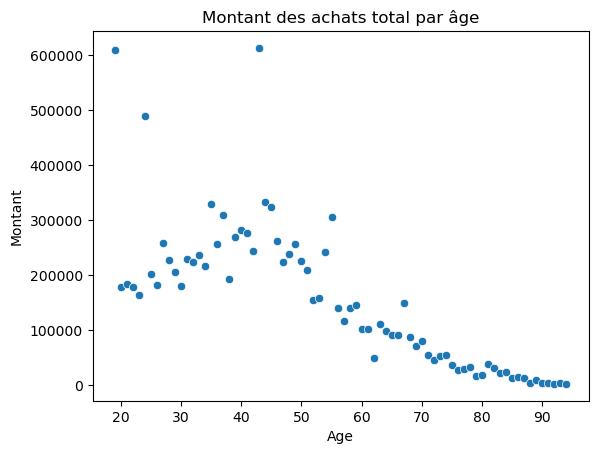

In [89]:
sns.scatterplot(data= mtt_achat_age)
plt.title("Montant des achats total par âge")
plt.ylabel("Montant")
plt.xlabel("Age")
plt.show()

Le nuage de point montre une croissance plutot linéaire négative.

In [90]:
#test de normalité
from scipy import stats
stats.kstest(mtt_achat_age, stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [91]:
from scipy import stats
stats.kstest(total_jointure['age'], stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

L'hypothèse H0 est rejetté car les distributions ne sont pas normales, si elles étaient normales j'aurai utilisé le test de Pearson et là dans ce cas j'utilise le test de spearman.

In [92]:
#Calcul de la corrélation avec le test Spearmanr
print('Corrélation de Speramn : ', scipy.stats.spearmanr(mtt_achat_age.index,mtt_achat_age.values))

Corrélation de Speramn :  SpearmanrResult(correlation=-0.8576076555023923, pvalue=4.57972879340901e-23)


Après calcul, on voit une corrélation négative de : -0,9, quand une variable augmente l'autre diminue ou inversement. La p-value est supérieur à 0,05 alors les résultats ne sont statistiquement pas significatif

## Age et taille du panier moyen

In [93]:
#Lien entre âge et le taille du panier moyen variable quanti et qanti
#refaire les mêmes test pour deux variables quanti
nbr_achat_panier_age = total_jointure.groupby(["age"])["session_id"].count()
print("La taille du panier moyen par âge est de \n" , f"{nbr_achat_panier_age}")

La taille du panier moyen par âge est de 
 age
19.0    15149
20.0     4371
21.0     4587
22.0     4252
23.0     4415
        ...  
90.0      327
91.0      311
92.0      170
93.0      226
94.0      201
Name: session_id, Length: 76, dtype: int64


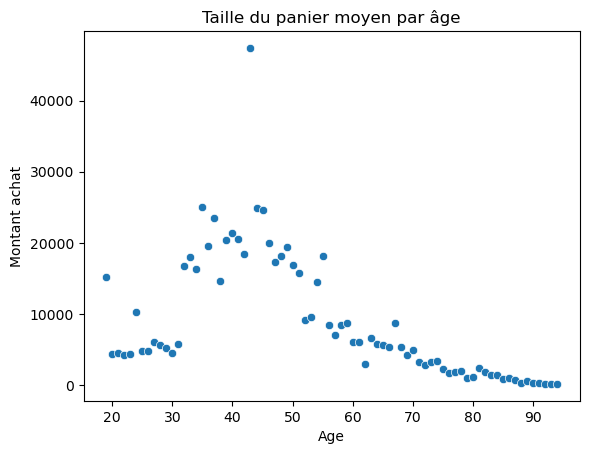

In [94]:
#graph
sns.scatterplot(data= nbr_achat_panier_age)
plt.title("Taille du panier moyen par âge")
plt.ylabel("Montant achat")
plt.xlabel("Age")
plt.show()

Sur le graph on constate que les variables ne suivent pas une loi normale, il faut utiliser un test non paramétrique. 

In [95]:
#test de normalité à rajouter
from scipy import stats
stats.kstest(nbr_achat_panier_age, stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [96]:
#test de normalité à rajouter
from scipy import stats
stats.kstest(total_jointure['age'], stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

L'hypothèse H0 est rejetté car les distributions ne sont pas normales, si elles étaient normales j'aurai utilisé le test de Pearson et là dans ce cas j'utilise le test de spearman.

In [97]:
#corrélation Spearman 
print("Le résultat du test de Spearman est \n", scipy.stats.pearsonr(nbr_achat_panier_age.index,nbr_achat_panier_age.values))

Le résultat du test de Spearman est 
 PearsonRResult(statistic=-0.5337045762407475, pvalue=6.888377875054196e-07)


Une valeur négative signifiant que lorsqu'une des variable augmente, l'autre diminue. Ici nous avons -0,7 comme corrélation donc on peut conclure que plus une variable augmente, l'autre diminue. Plus l'âge augmente, plus la taille du panier moyen diminue et inversement.
On constate que la p-value est supérieur à 0,05 donc les résultats statistiques sont non significatif

## Age client et catégorie (Quali - Quanti)

In [98]:
#moyenne categ test kruskal wallis
total_jointure.groupby("categ").mean()

,birth,price,année,mois,jour,age
categ,,,,,,
0.0,1978.102384,10.637843,2021.651814,6.553743,15.791188,44.897616
1.0,1974.348762,20.485730,2021.702094,6.442758,15.701566,48.651238
2.0,1996.051969,76.207412,2021.686731,6.325165,15.840967,26.948031


In [99]:
total_jointure.groupby("categ")["age"].agg([np.mean, np.std, np.median, np.min, np.max])

,mean,std,median,amin,amax
categ,,,,,
0.0,44.897616,11.209482,43.0,19.0,94.0
1.0,48.651238,15.495910,48.0,19.0,94.0
2.0,26.948031,9.798143,24.0,19.0,94.0


In [100]:
#categ0
categ0 = total_jointure.loc[(total_jointure['categ'] == 0)]
categ0_age = categ0["age"]
#categ1
categ1 = total_jointure.loc[(total_jointure['categ'] == 1)]
categ1_age = categ1["age"]
#categ2
categ2 = total_jointure.loc[(total_jointure['categ'] == 2)]
categ2_age = categ2["age"]

<AxesSubplot:title={'center':'age'}, xlabel='categ'>

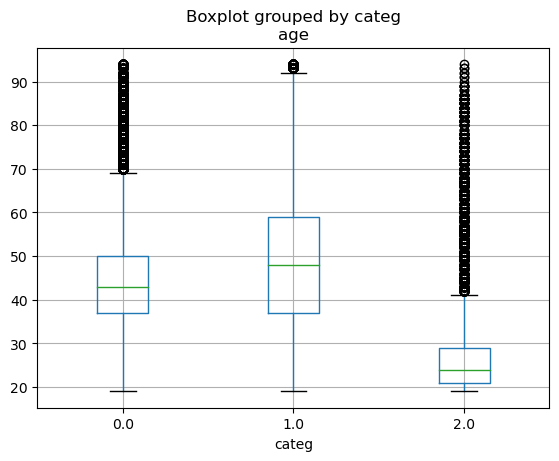

In [101]:
total_jointure.boxplot(column = "age", by = "categ")

Chaque individu appartient a chaque catégorie indépendamment

In [102]:
#normalité des résidus
from statsmodels.formula.api import ols
model = ols('age ~ categ', data=total_jointure).fit()
scipy.stats.kstest((model.resid),'norm')

KstestResult(statistic=0.4943034755970918, pvalue=0.0)

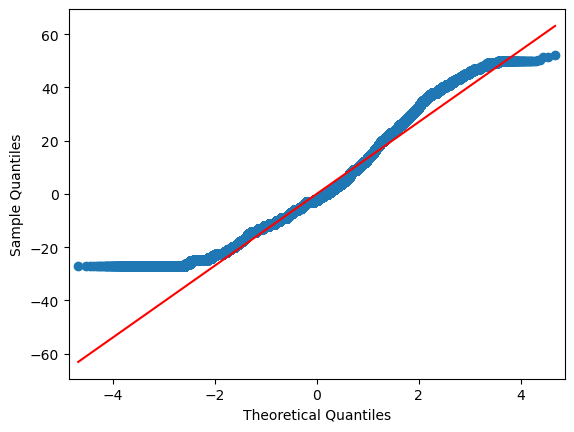

In [103]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line='s')
plt.show()

Les valeurs de données ne suivent clairement pas la ligne rouge de 45 degrés, ce qui indique qu’elles ne suivent pas une distribution normale.

In [104]:
#test de l'égalité des variance
from scipy.stats import levene
import math
nCateg0_age = [x for x in categ0_age if math.isnan(x) == False]
nCateg1_age = [x for x in categ1_age if math.isnan(x) == False]
nCateg2_age = [x for x in categ2_age if math.isnan(x) == False]
stat, p = levene(nCateg0_age,nCateg1_age,nCateg2_age)
print("Stat du test:",F"{stat}")
print("Valeur de p:", F"{p}")

Stat du test: 26091.73083988351
Valeur de p: 0.0


Puisque la valeur de p est inférieure à 0,05, nous rejetons l’hypothèse nulle et concluons qu’au moins une paire de groupes a des variances inégales.

In [105]:
#test de Kruskal wallis comme les variables ne sont pas paramétriques
print(scipy.stats.kruskal(nCateg0_age,nCateg1_age,nCateg2_age))

KruskalResult(statistic=79350.86927924873, pvalue=0.0)


Le test de Kruskal Wallis montre une p-value < 0,05, on rejette l'hypothèse nulle selon laquelle les moyennes des groupes sont égales.
l'hypothèse h1 est au moins est inégale aux autres, et donc on peut en conclure qu'il y a une influence de l'âge sur le choix de la catégorie.

## Age et fréquence (Quanti)

In [106]:
#Frequence et age
freq_mensu = total_jointure.groupby(["client_id","année","mois"])["session_id"].nunique().groupby(["client_id"]).mean().reset_index()
freq_mensu = pd.merge(total_jointure,freq_mensu,on="client_id",how="outer")

In [107]:
freq_mensu.loc[freq_mensu['session_id_x'].isnull(),:]

,client_id,sex,birth,id_prod,session_id_x,price,categ,année,mois,jour,age,age_group,session_id_y
679332,c_8253,f,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,"(0, 30]",NaN
679333,c_3789,f,1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,"(0, 30]",NaN
679334,c_4406,f,1998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,"(0, 30]",NaN
679335,ct_0,f,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,"(0, 30]",NaN
679336,c_2706,f,1967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,"(30, 60]",NaN
679337,c_3443,m,1959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,"(60, 110]",NaN
679338,c_4447,m,1956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,"(60, 110]",NaN
679339,c_3017,f,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,"(30, 60]",NaN
679340,c_4086,f,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,"(30, 60]",NaN
679341,c_6930,m,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,"(0, 30]",NaN


In [108]:
freq_mensu= freq_mensu[freq_mensu['session_id_x'].notnull()]

In [109]:
freq_mensu

,client_id,sex,birth,id_prod,session_id_x,price,categ,année,mois,jour,age,age_group,session_id_y
0,c_4410,f,1967.0,0_1316,s_141762,7.20,0.0,2021.0,12.0,29.0,56.0,"(30, 60]",2.47619
1,c_4410,f,1967.0,0_1316,s_186233,7.20,0.0,2022.0,3.0,29.0,56.0,"(30, 60]",2.47619
2,c_4410,f,1967.0,0_1316,s_215758,7.20,0.0,2022.0,5.0,29.0,56.0,"(30, 60]",2.47619
3,c_4410,f,1967.0,1_385,s_9707,25.99,1.0,2021.0,3.0,22.0,56.0,"(30, 60]",2.47619
4,c_4410,f,1967.0,1_385,s_345108,25.99,1.0,2023.0,2.0,22.0,56.0,"(30, 60]",2.47619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,c_4391,f,2001.0,2_147,s_65994,181.99,2.0,2021.0,7.0,23.0,22.0,"(0, 30]",1.00000
679328,c_4540,m,2003.0,2_147,s_263366,181.99,2.0,2022.0,9.0,5.0,20.0,"(0, 30]",1.00000
679329,c_4540,m,2003.0,2_147,s_129519,181.99,2.0,2021.0,12.0,5.0,20.0,"(0, 30]",1.00000
679330,c_7534,m,1992.0,2_205,s_4605,100.99,2.0,2021.0,3.0,11.0,31.0,"(30, 60]",1.00000


In [110]:
freq_age = freq_mensu.groupby(["age"])["session_id_y"].sum()
freq_age

age
19.0    24385.038907
20.0     6953.523575
21.0     7127.226575
22.0     6916.830048
23.0     7218.636357
            ...     
90.0      839.227362
91.0      803.196429
92.0      311.856863
93.0      802.877847
94.0      534.850490
Name: session_id_y, Length: 76, dtype: float64

In [111]:
#freq_mensu.drop(freq_mensu[(freq_mensu["client_id"] == "c_1609")].index, inplace = True)
#freq_mensu.drop(freq_mensu[(freq_mensu["client_id"] == "c_3454")].index, inplace = True)
#freq_mensu.drop(freq_mensu[(freq_mensu["client_id"] == "c_4958")].index, inplace = True)
#freq_mensu.drop(freq_mensu[(freq_mensu["client_id"] == "c_6714")].index, inplace = True)

In [112]:
freq_age

age
19.0    24385.038907
20.0     6953.523575
21.0     7127.226575
22.0     6916.830048
23.0     7218.636357
            ...     
90.0      839.227362
91.0      803.196429
92.0      311.856863
93.0      802.877847
94.0      534.850490
Name: session_id_y, Length: 76, dtype: float64

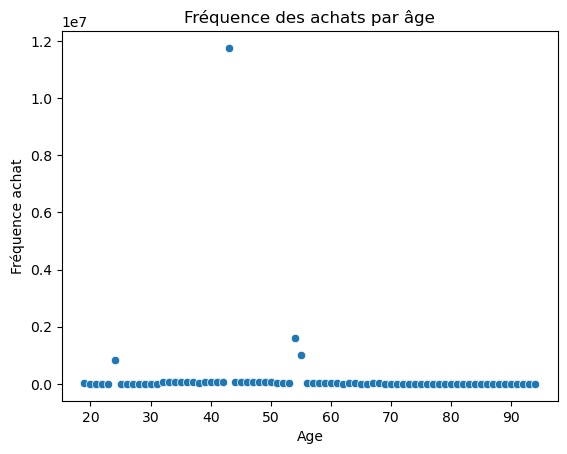

In [113]:
sns.scatterplot(data= freq_age)
plt.title("Fréquence des achats par âge")
plt.ylabel("Fréquence achat")
plt.xlabel("Age")
plt.show()

In [114]:
#test de normalité
from scipy import stats
stats.kstest(freq_age, stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [115]:
#test de normalité
from scipy import stats
stats.kstest(freq_mensu['age'], stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

L'hypothèse H0 est rejetté car les distributions ne sont pas normales, si elles étaient normales j'aurai utilisé le test de Pearson et là dans ce cas j'utilise le test de spearman.

In [116]:
#corrélation Spearman 
print("Le résultat du test de Spearman est \n", scipy.stats.pearsonr(freq_age.index,freq_age.values))

Le résultat du test de Spearman est 
 PearsonRResult(statistic=-0.09336483192637379, pvalue=0.4224369301126526)


Une valeur négative signifiant que lorsqu'une des variable augmente, l'autre diminue. Ici nous avons -0,5 comme corrélation donc on peut conclure que plus une variable augmente, l'autre diminue. Plus l'âge augmente, plus la taille du panier moyen diminue et inversement.
On constate que la p-value est supérieur à 0,05 donc les résultats statistiques sont non significatif